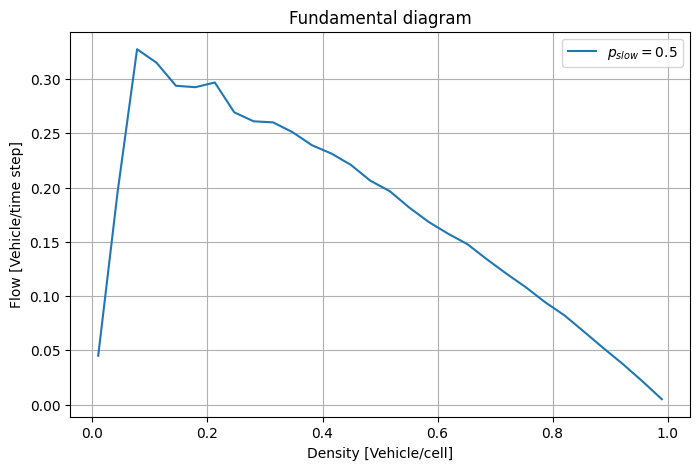

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def update(cells, v, v_max, p_slow):
    N_cell = len(cells)
    positions = np.where(cells == 1)[0]
    positions_sorted = np.sort(positions)
    n_cars = len(positions_sorted)
    d = np.zeros(N_cell, dtype=int)

    for idx in range(n_cars):
        i = positions_sorted[idx]
        j = positions_sorted[(idx + 1) % n_cars]
        dist = (j - i - 1) % N_cell
        d[i] = dist

    v_new = np.minimum(v + 1, v_max)
    v_new = np.minimum(v_new, d)
    rand_vals = np.random.rand(N_cell)
    v_new[(cells == 1) & (rand_vals < p_slow) & (v_new > 0)] -= 1

    cells_new = np.zeros_like(cells)
    v_result = np.zeros_like(v)
    for i in positions_sorted:
        move = v_new[i]
        new_pos = (i + move) % N_cell
        if cells_new[new_pos] == 0:
            cells_new[new_pos] = 1
            v_result[new_pos] = v_new[i]
        else:
            cells_new[i] = 1
            v_result[i] = 0
    return cells_new, v_result

#  Параметры модели из задания
N_cell = 2000
T_e = 50
T_s = 2000
v_max = 5
p_slow = 0.5

densities = np.linspace(0.01, 0.99, 30)
flows = []

for rho in densities:
    N = int(rho * N_cell)
    cells = np.zeros(N_cell, dtype=int)
    cars_idx = np.random.choice(N_cell, N, replace=False)
    cells[cars_idx] = 1
    v = np.random.randint(0, v_max + 1, size=N_cell)
    v[cells == 0] = 0
    cells, v = cells.copy(), v.copy()
    speeds = []
    for step in range(T_s + T_e):
        cells, v = update(cells, v, v_max, p_slow)
        if step >= T_s:
            speeds.append(np.sum(v[cells == 1]))
    v_avg = np.mean(speeds) / N if N > 0 else 0
    q = rho * v_avg
    flows.append(q)

plt.figure(figsize=(8,5))
plt.plot(densities, flows, label='$p_{slow}=0.5$')
plt.xlabel('Density [Vehicle/cell]')
plt.ylabel('Flow [Vehicle/time step]')
plt.title('Fundamental diagram')
plt.legend()
plt.grid()
plt.show()


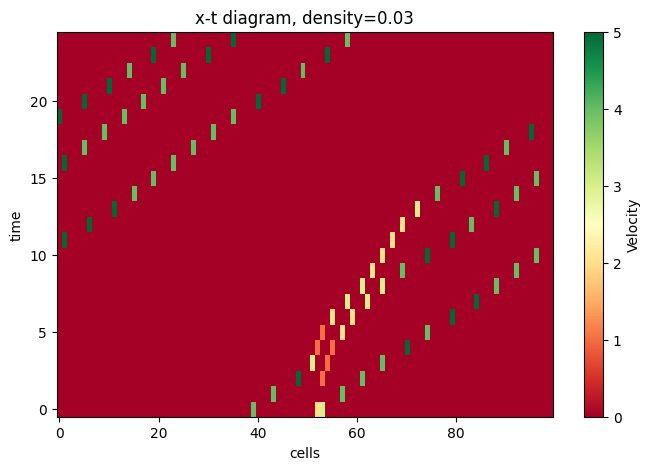

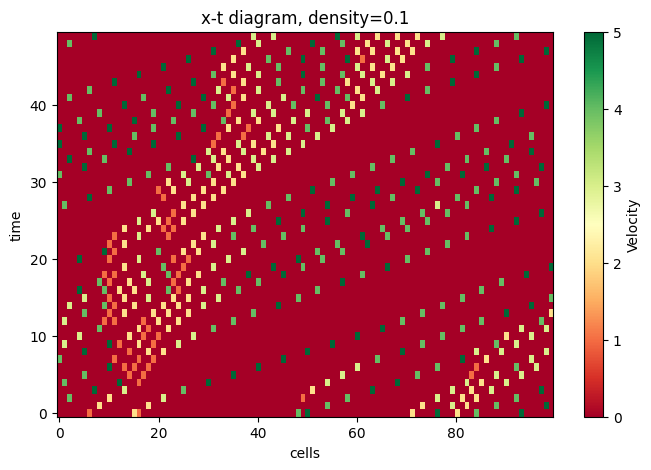

In [5]:
def xt_diagram(N_cell=100, N=3, steps=25, v_max=5, p_slow=0.5):
    cells = np.zeros(N_cell, dtype=int)
    cars_idx = np.random.choice(N_cell, N, replace=False)
    cells[cars_idx] = 1
    v = np.random.randint(0, v_max + 1, size=N_cell)
    v[cells == 0] = 0

    track = np.zeros((steps, N_cell), dtype=int)
    for t in range(steps):
        track[t] = v
        cells, v = update(cells, v, v_max, p_slow)
    return track

# x-t диаграммы для двух плотностей:
for rho, steps in [(0.03, 25), (0.1, 50)]:
    N = int(100 * rho)
    track = xt_diagram(N_cell=100, N=N, steps=steps, v_max=5, p_slow=0.5)
    plt.figure(figsize=(8, 5))
    plt.imshow(track, cmap='RdYlGn', aspect='auto', origin='lower')
    plt.colorbar(label='Velocity')
    plt.xlabel("cells")
    plt.ylabel("time")
    plt.title(f"x-t diagram, density={rho}")
    plt.show()


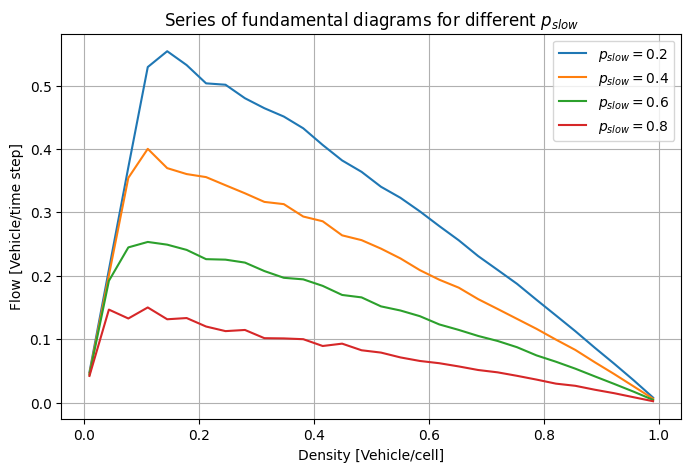

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def update(cells, v, v_max, p_slow):
    N_cell = len(cells)
    positions = np.where(cells == 1)[0]
    positions_sorted = np.sort(positions)
    n_cars = len(positions_sorted)
    d = np.zeros(N_cell, dtype=int)
    for idx in range(n_cars):
        i = positions_sorted[idx]
        j = positions_sorted[(idx + 1) % n_cars]
        dist = (j - i - 1) % N_cell
        d[i] = dist
    v_new = np.minimum(v + 1, v_max)
    v_new = np.minimum(v_new, d)
    rand_vals = np.random.rand(N_cell)
    v_new[(cells == 1) & (rand_vals < p_slow) & (v_new > 0)] -= 1
    cells_new = np.zeros_like(cells)
    v_result = np.zeros_like(v)
    for i in positions_sorted:
        move = v_new[i]
        new_pos = (i + move) % N_cell
        if cells_new[new_pos] == 0:
            cells_new[new_pos] = 1
            v_result[new_pos] = v_new[i]
        else:
            cells_new[i] = 1
            v_result[i] = 0
    return cells_new, v_result

N_cell = 2000
T_e = 50
T_s = 2000
v_max = 5
densities = np.linspace(0.01, 0.99, 30)
pslow_list = [0.2, 0.4, 0.6, 0.8]  # Список p_slow

plt.figure(figsize=(8,5))
for p_slow in pslow_list:
    flows = []
    for rho in densities:
        N = int(rho * N_cell)
        cells = np.zeros(N_cell, dtype=int)
        cars_idx = np.random.choice(N_cell, N, replace=False)
        cells[cars_idx] = 1
        v = np.random.randint(0, v_max + 1, size=N_cell)
        v[cells == 0] = 0
        cells, v = cells.copy(), v.copy()
        speeds = []
        for step in range(T_s + T_e):
            cells, v = update(cells, v, v_max, p_slow)
            if step >= T_s:
                speeds.append(np.sum(v[cells == 1]))
        v_avg = np.mean(speeds) / N if N > 0 else 0
        q = rho * v_avg
        flows.append(q)
    plt.plot(densities, flows, label=f'$p_{{slow}}={p_slow}$')

plt.xlabel('Density [Vehicle/cell]')
plt.ylabel('Flow [Vehicle/time step]')
plt.title('Series of fundamental diagrams for different $p_{slow}$')
plt.legend()
plt.grid()
plt.show()


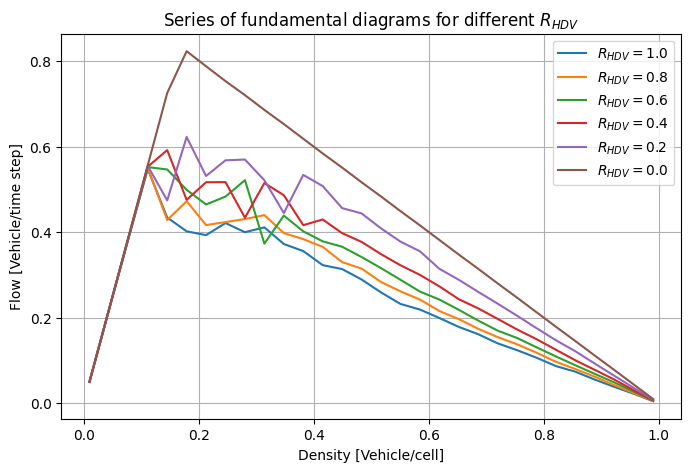

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def update(cells, v, v_max, p_slow_array):
    N_cell = len(cells)
    positions = np.where(cells == 1)[0]
    positions_sorted = np.sort(positions)
    n_cars = len(positions_sorted)
    d = np.zeros(N_cell, dtype=int)
    for idx in range(n_cars):
        i = positions_sorted[idx]
        j = positions_sorted[(idx + 1) % n_cars]
        dist = (j - i - 1) % N_cell
        d[i] = dist
    v_new = np.minimum(v + 1, v_max)
    v_new = np.minimum(v_new, d)
    rand_vals = np.random.rand(N_cell)
    v_new[(cells == 1) & (rand_vals < p_slow_array) & (v_new > 0)] -= 1
    cells_new = np.zeros_like(cells)
    v_result = np.zeros_like(v)
    for i in positions_sorted:
        move = v_new[i]
        new_pos = (i + move) % N_cell
        if cells_new[new_pos] == 0:
            cells_new[new_pos] = 1
            v_result[new_pos] = v_new[i]
        else:
            cells_new[i] = 1
            v_result[i] = 0
    return cells_new, v_result

N_cell = 2000
T_e = 50
T_s = 2000
v_max = 5
densities = np.linspace(0.01, 0.99, 30)
R_list = [1.0, 0.8, 0.6, 0.4, 0.2, 0.0]  # Доли HDV (управляемые человеком)
p_slow_human = 0.5

plt.figure(figsize=(8,5))
for R_HDV in R_list:
    flows = []
    for rho in densities:
        N = int(rho * N_cell)
        cells = np.zeros(N_cell, dtype=int)
        cars_idx = np.random.choice(N_cell, N, replace=False)
        cells[cars_idx] = 1
        v = np.random.randint(0, v_max + 1, size=N_cell)
        v[cells == 0] = 0
        # Формируем массив p_slow для каждой машины
        p_slow_array = np.zeros(N_cell)
        N_human = int(R_HDV * N)
        if N_human > 0:
            # среди выбранных позиций автомобилей случайно выбираем "человеческие"
            human_idx = np.random.choice(cars_idx, N_human, replace=False)
            p_slow_array[human_idx] = p_slow_human
        cells, v = cells.copy(), v.copy()
        speeds = []
        for step in range(T_s + T_e):
            cells, v = update(cells, v, v_max, p_slow_array)
            if step >= T_s:
                speeds.append(np.sum(v[cells == 1]))
        v_avg = np.mean(speeds) / N if N > 0 else 0
        q = rho * v_avg
        flows.append(q)
    plt.plot(densities, flows, label=f'$R_{{HDV}}={R_HDV:.1f}$')

plt.xlabel('Density [Vehicle/cell]')
plt.ylabel('Flow [Vehicle/time step]')
plt.title('Series of fundamental diagrams for different $R_{HDV}$')
plt.legend()
plt.grid()
plt.show()


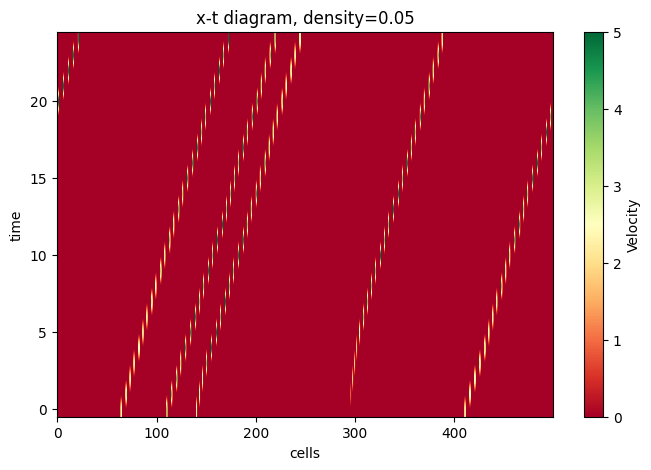

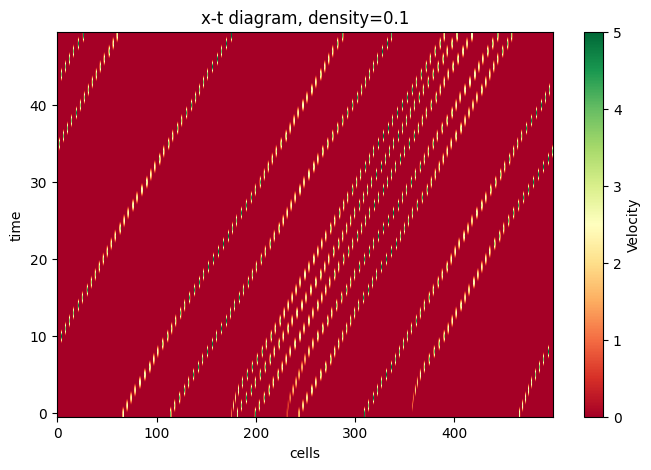

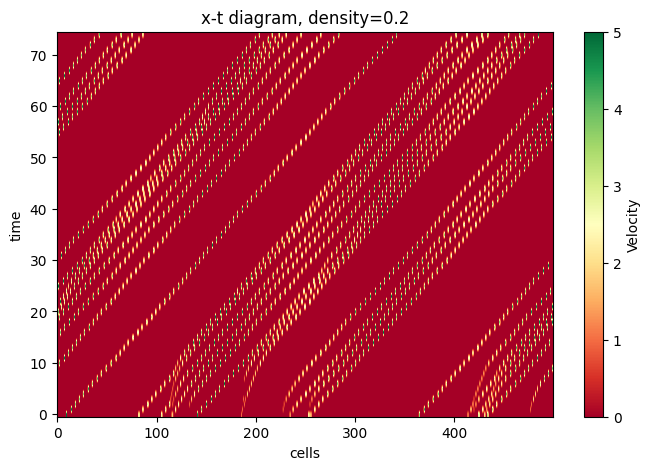

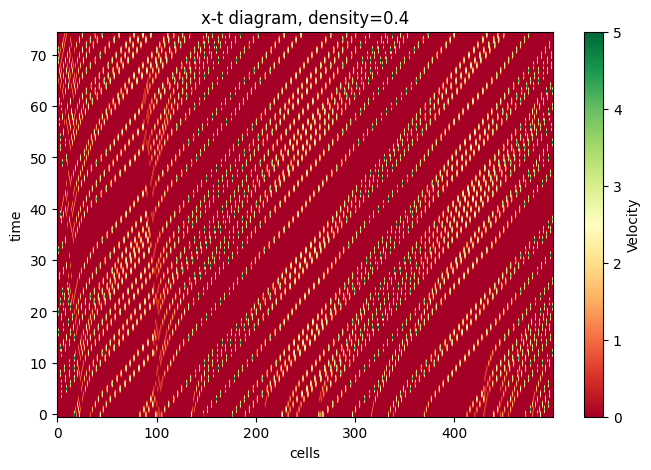

In [67]:
def xt_diagram(N_cell=100, N=3, steps=25, v_max=5, p_slow=0.5):
    cells = np.zeros(N_cell, dtype=int)
    cars_idx = np.random.choice(N_cell, N, replace=False)
    cells[cars_idx] = 1
    v = np.random.randint(0, v_max + 1, size=N_cell)
    v[cells == 0] = 0

    track = np.zeros((steps, N_cell), dtype=int)
    for t in range(steps):
        track[t] = v
        cells, v = update(cells, v, v_max, p_slow)
    return track

for rho, steps in [(0.05, 25), (0.1, 50), (0.2, 75), (0.4, 75)]:
    N = int(100 * rho)
    track = xt_diagram(N_cell=500, N=N, steps=steps, v_max=5, p_slow=0.5)
    plt.figure(figsize=(8, 5))
    plt.imshow(track, cmap='RdYlGn', aspect='auto', origin='lower')
    plt.colorbar(label='Velocity')
    plt.xlabel("cells")
    plt.ylabel("time")
    plt.title(f"x-t diagram, density={rho}")
    plt.show()
